# IMAGE AND AUDIO

##### All algorithms were designed by Hyungjoo Kim and Dataset was provided by UCL

In [ ]:
import os
import cv2
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [8]:
# Using GPU or CPU
cuda = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if cuda:
    print(f'gpu count: {torch.cuda.device_count()}')

gpu count: 1


## Filtering 1D and 2D

**Implement a filter to remove low frequencies from the audio fileaudio.npy.**

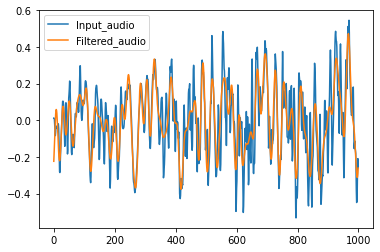

In [9]:
input_audio_filename = "./Datasets/Filtering/audio.npy"

# LOAD input_audio FROM input_audio_filename
input_audio = np.load(input_audio_filename)
#print(input_audio.shape)  # (1000, )

def lowpass_filter_audio(audio, ratio = 0.5):
    # IMPLEMENT THIS FUNCTION
    sp = np.fft.rfft(audio)    # Fourier Transform (wave(time_domain) -> spectrum(frequency_domain))
    sp[-int(len(sp) * ratio):] = 0   # Remove low frequency Components
    filtered_audio = np.fft.irfft(sp)  # Inverse Fourier Transform (spectrum(frequency_domain) -> wave(time_domain))
    
    return filtered_audio

filtered_audio = lowpass_filter_audio(input_audio, 0.9)

# PLOT input_audio AND filtered_audio
plt.plot(input_audio)
plt.plot(filtered_audio)
plt.legend(['Input_audio', 'Filtered_audio'])

# you can control the ratio to manipulate how much do you want to remove the low frequency

**Implement a filter to find vertical edges in an image. A sample fileimage.png for testing.**

In [10]:
input_image_filename = "./Datasets/Filtering/image.png"

# LOAD input_image FROM input_image_filename
image = Image.open(input_image_filename)
input_image = np.mean(np.array(image), axis = -1)


def detect_vertical_edges(image, ratio):
    # IMPLEMENT THIS FUNCTION
    sp = np.fft.rfft(image, axis = 1)
    sp[:, :int(len(sp) * ratio)] = 0   # Remove low frequency components, sp[all rows, front columns] = 0
    filtered_image = np.fft.irfft(sp, axis = 1)
    
    return filtered_image

filtered_image = detect_vertical_edges(input_image, 0.1)

# DISPLAY input_image AND filtered_image here
input_img = Image.fromarray(np.uint8(input_image))
filtered_img = Image.fromarray(np.uint8(filtered_image))
#np.array(filtered_img).shape
#print(input_image.shape)
#print(np.array(filtered_img).shape)

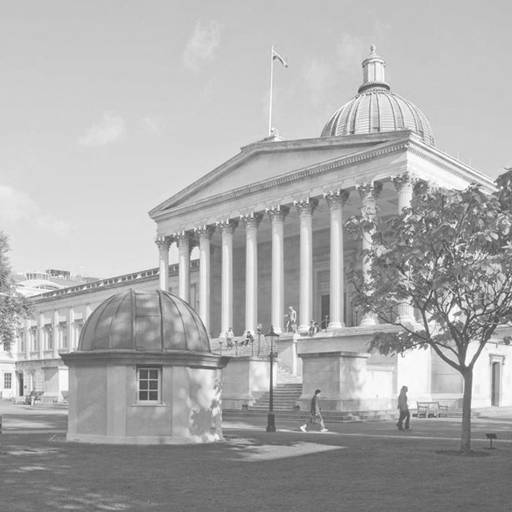

In [11]:
input_img   # Input image

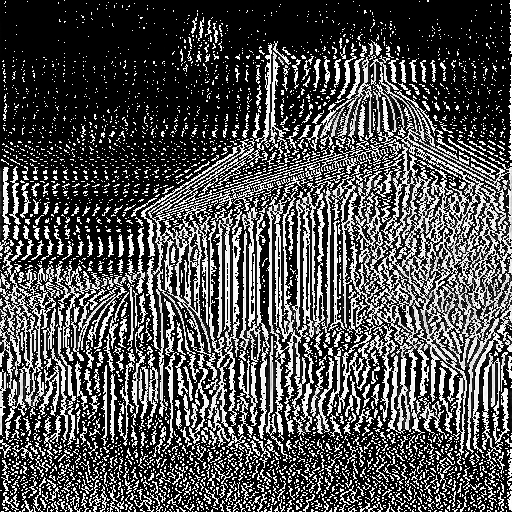

In [12]:
filtered_img    # Ouput filter image